In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
upload = files.upload()

import io
data_train = pd.read_csv(io.BytesIO(upload['gempa - train.csv']))
data_train

Saving gempa - train.csv to gempa - train (1).csv


,No,Latitude,Longitude,Depth,Magnitude,Class
0,1,19,145,131.6,6.00,Gempa
1,2,-59,-27,15.0,5.80,Gempa
2,3,-21,-139,0.0,5.70,Ledakan
3,4,-21,-138,0.0,5.70,Ledakan
4,5,19,127,15.0,5.80,Gempa
5,6,-21,-173,20.0,6.20,Gempa
6,7,73,55,0.0,6.40,Ledakan
7,8,70,55,0.0,6.90,Ledakan Nuklir
8,9,70,55,0.0,6.90,Ledakan Nuklir
9,10,73,55,0.0,6.40,Ledakan Nuklir


In [6]:
from google.colab import files
upload = files.upload()

import io
data_test = pd.read_csv(io.BytesIO(upload['gempa - test.csv']))
data_test

Saving gempa - test.csv to gempa - test (1).csv


,No,Latitude,Longitude,Depth,Magnitude,Class
0,1,19,145,131.6,6.00,Gempa
1,2,-59,-27,15.0,5.80,Gempa
2,3,-21,-139,0.0,5.70,Ledakan
3,4,-21,-138,0.0,5.70,Ledakan
4,5,19,127,15.0,5.80,Gempa
5,6,-21,-173,20.0,6.20,Gempa
6,7,73,55,0.0,6.40,Ledakan
7,8,70,55,0.0,6.90,Ledakan Nuklir
8,9,70,55,0.0,6.90,Ledakan Nuklir
9,10,73,55,0.0,6.40,Ledakan Nuklir


In [7]:
le = preprocessing.LabelEncoder()
data_train_df = pd.DataFrame(data_train)
data_train_df_encoded = data_train_df.apply(le.fit_transform)

data_test_df = pd.DataFrame(data_test)
data_test_df_encoded = data_test_df.apply(le.fit_transform)

In [8]:
data_train_df

,No,Latitude,Longitude,Depth,Magnitude,Class
0,1,19,145,131.6,6.00,Gempa
1,2,-59,-27,15.0,5.80,Gempa
2,3,-21,-139,0.0,5.70,Ledakan
3,4,-21,-138,0.0,5.70,Ledakan
4,5,19,127,15.0,5.80,Gempa
5,6,-21,-173,20.0,6.20,Gempa
6,7,73,55,0.0,6.40,Ledakan
7,8,70,55,0.0,6.90,Ledakan Nuklir
8,9,70,55,0.0,6.90,Ledakan Nuklir
9,10,73,55,0.0,6.40,Ledakan Nuklir


In [9]:
data_test_df

,No,Latitude,Longitude,Depth,Magnitude,Class
0,1,19,145,131.6,6.00,Gempa
1,2,-59,-27,15.0,5.80,Gempa
2,3,-21,-139,0.0,5.70,Ledakan
3,4,-21,-138,0.0,5.70,Ledakan
4,5,19,127,15.0,5.80,Gempa
5,6,-21,-173,20.0,6.20,Gempa
6,7,73,55,0.0,6.40,Ledakan
7,8,70,55,0.0,6.90,Ledakan Nuklir
8,9,70,55,0.0,6.90,Ledakan Nuklir
9,10,73,55,0.0,6.40,Ledakan Nuklir


In [10]:
x_train = data_train_df_encoded.drop(['Class'],axis=1)
y_train = data_train_df_encoded['Class']

x_test = data_test_df_encoded.drop(['Class'],axis=1)
y_test = data_test_df_encoded['Class']

In [11]:
model = GaussianNB()
nbtrain = model.fit(x_train, y_train)

y_pred = nbtrain.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7666666666666667


Confusion Matrix
[[10  0  0  0]
 [ 0  4  0  0]
 [ 0  0  4  0]
 [ 0  7  0  5]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


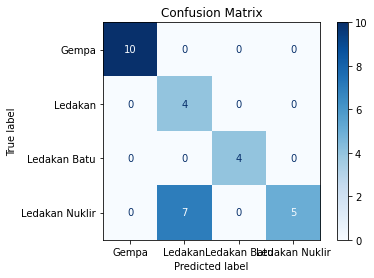

In [13]:
disp = plot_confusion_matrix(nbtrain, x_test, y_test,
                                 display_labels=['Gempa','Ledakan','Ledakan Batu','Ledakan Nuklir'],
                                 cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')

print('Confusion Matrix')
print(disp.confusion_matrix)

plt.show()